In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

housnig = pd.read_csv('./housing.csv', header=0, sep=',')

train_set, test_set = train_test_split(housnig, test_size=0.2, random_state = 42)
# train_set.shape
train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

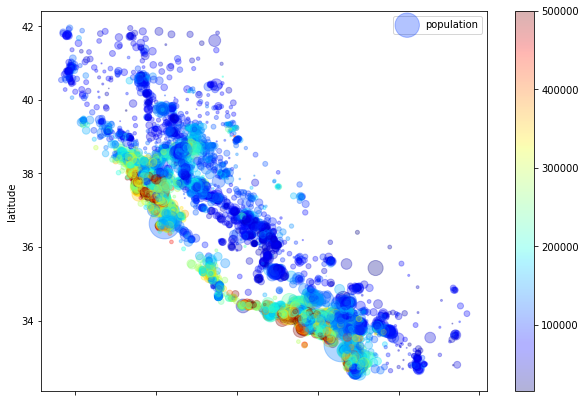

In [4]:

data = train_set.copy()
data.head()
data.plot(kind="scatter", x="longitude", y="latitude",
          s=data["population"]/30,
          label="population",
          figsize=(10, 7),
          alpha=0.3,
          c=data["median_house_value"],
          cmap=plt.get_cmap("jet")
          )


In [5]:
# standard correlation coefficient [-1,1]
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

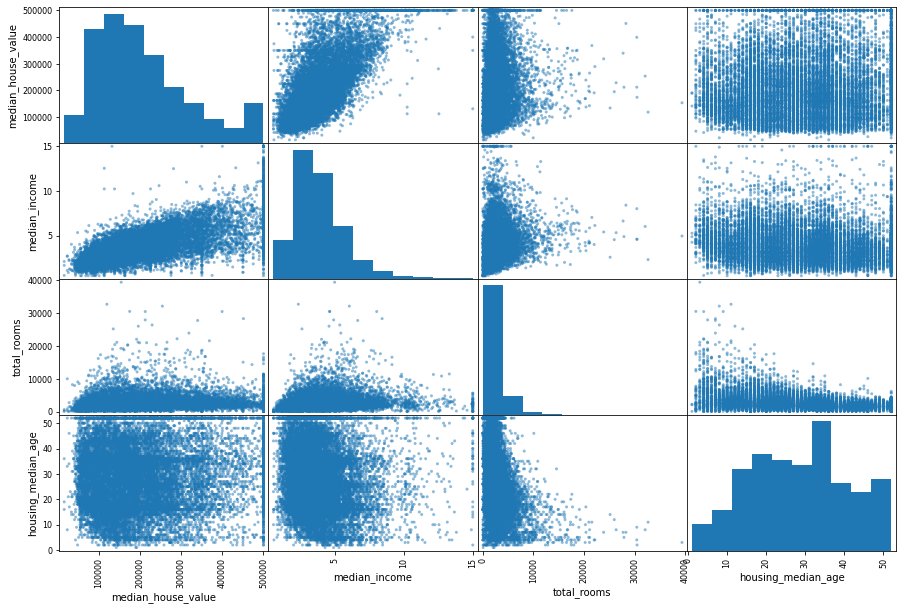

In [6]:
features = ['median_house_value', 'median_income',
            'total_rooms', 'housing_median_age']

scatter_matrix(data[features], figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

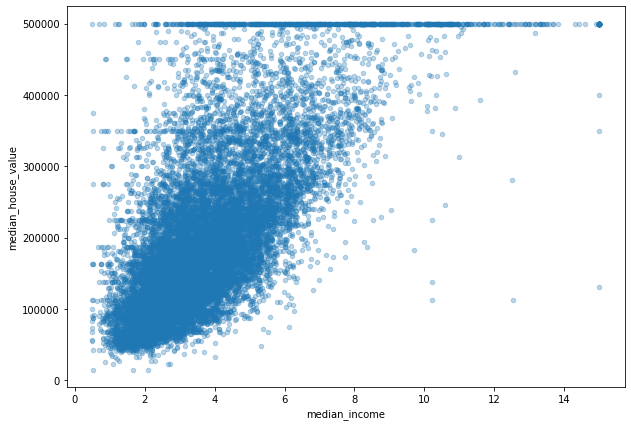

In [7]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
          figsize=(10, 7),
          alpha=0.3,
          )


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [9]:
data['total_rooms_per_households'] = data['total_rooms']/ data['households']
data['total_bedrooms_per_total_rooms'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_total_rooms'] = data['population']/ data['total_rooms']

# standard corrieation coefficient [-1,1]
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


# seaborn , matplotlib  => readMore

median_house_value                1.000000
median_income                     0.690647
total_rooms_per_households        0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
population                       -0.026032
population_per_total_rooms       -0.031160
longitude                        -0.046349
latitude                         -0.142983
total_bedrooms_per_total_rooms   -0.257419
Name: median_house_value, dtype: float64